# SQL on BigQuery

```
SELECT limit_balance, sex, education_level, marital_status, age, 
       pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, 
       bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
       pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
       default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 37981
```

# 1 - Perkenalan
  > Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan _objective_ yang ingin dicapai.

## 1 - Identity

  Nama : Jason Rich Darmawan Onggo Putra
  
  Batch : 016 RMT

## 2 - Dataset Overview

## 3 - Objective

  > Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

  Choose an algorithm with default parameters that have the best metrics. Then, improve the algorithm with tuned parameters.

  The algorithm should have metircs:
  1. accuracy score of 0.8
  2. recall score of 0.9 for class 1
  3. precision score of 0.9 for class 1
  4. f1 score of 0.9 for class 1.

# 2 - Import Libraries
  > _Cell_ pertama pada _notebook_ **harus berisi dan hanya berisi** semua _library_ yang digunakan dalam _project_.

In [57]:
# Data Loading
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

# Data Preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Definition
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 3 - Data Loading
  > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset
data_set = pd.read_csv("./h8dsft_P1M1_jason_rich_darmawan_onggo_putra.csv")

## 1 - Columns Data Types

In [3]:
# head and tail
data_set

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


## 2 - Columns Dtypes

- no missing values
- [x] change columns dtypes to 'object': 'sex', 'education_level', 'marital_status', 'default_payment_next_month'
- [x] change columns dtypes to 'category': 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6' [outline](#41---what-are-pay_0-bill_amt_1-pay_amt_1)

- numerical data: 
  - 'limit_balance', 'age'
  - 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6'
  - 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'
- nominal data: 
  - 'sex'
  - 'education_level'
    
    description:
    > Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
  - 'marital_status'
    
    description:
    > Marital status (1=married, 2=single, 3=others)
- ordinal data: 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6' [outline](#41---what-are-pay_0-bill_amt_1-pay_amt_1)

Rules for pandas dtypes:
1. ordinal use 'category' dtypes.
2. nominal use 'object' dtypes.
3. numerical use 'number' dtypes.
4. target use 'category' dtypes. due to issue with sklearn.

In [4]:
# find the columns dtypes
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

In [5]:
# change nominal data dtypes to object
data_set[['sex', 'education_level', 'marital_status']] = \
    data_set[['sex', 'education_level', 'marital_status']].astype('object')

In [6]:
type_pay0_pay6 = pd.api.types.CategoricalDtype(categories=[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])

# change ordinal data dtypes to category
data_set[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']] = \
    data_set[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].astype(type_pay0_pay6)

type_default_payment_next_month = pd.api.types.CategoricalDtype(categories=[0, 1])
data_set['default_payment_next_month'] = \
    data_set['default_payment_next_month'].astype(type_default_payment_next_month)

In [7]:
# get the columns
numerical_columns = data_set.select_dtypes(include='number').columns.to_numpy()
ordinal_columns = data_set.drop('default_payment_next_month', axis='columns').select_dtypes(include='category').columns.to_numpy()
nominal_columns = data_set.select_dtypes(include='object').columns.to_numpy()

## 3 - Central Tendency

- [x] why is 'bill_amt_2' have minus values. [outline](#42---relationship-between-x-numerical-and-y-categorical)
- [x] why is 'bill_amt_2' have high maximum values. [outline](#42---relationship-between-x-numerical-and-y-categorical)

In [8]:
# bill_amt_1 to bill_amt_6 have minus.
with pd.option_context("display.float_format", '{:,.0f}'.format):
    display(data_set.describe(include='number'))

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,"2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965","2,965"
mean,"163,369",35,"52,118","50,649","48,240","44,090","40,956","39,773","6,349","6,272","5,150","4,561","4,913","5,383"
std,"125,030",9,"72,329","70,785","68,146","61,907","58,272","57,303","20,886","28,880","14,287","13,281","16,734","17,276"
min,"10,000",21,"-11,545","-67,526","-25,443","-46,627","-46,627","-73,895",0,0,0,0,0,0
25%,"50,000",28,"3,958","3,390","3,302","2,582","1,958","1,430","1,013",990,477,313,323,173
50%,"140,000",34,"24,257","23,111","21,520","19,894","18,814","18,508","2,234","2,175","1,994","1,600","1,646","1,615"
75%,"230,000",41,"69,852","67,827","63,023","58,622","53,373","52,287","5,087","5,000","4,500","4,000","4,021","4,081"
max,"800,000",69,"613,860","512,650","578,971","488,808","441,981","436,172","493,358","1,227,082","199,209","202,076","388,071","403,500"


In [9]:
# get the mode and cardinality
data_set.describe(include=['object','category'])

,sex,education_level,marital_status,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
count,2965,2965,2965,2965,2965,2965,2965,2965,2965,2965
unique,2,7,4,11,10,9,10,9,8,2
top,2,2,2,0,0,0,0,0,0,0
freq,1802,1400,1594,1516,1607,1610,1667,1702,1626,2330


In [10]:
data_set['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

# 4 - Exploratory Data Analysis (EDA)
  > Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

  Task:
  1. Insights

## 4.1 - what are 'pay_2', 'bill_amt_2', 'pay_amt_1'

- [x] why 'pay_0' have value '-2'

  EDA shows there are '-2'.

  > [-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608)

- [x] is 'bill_amt_2' paid in 'pay_amt_1'?

  EDA shows there are a handful of people that paid in 'pay_amt_1' based on 'bill_amt_2'. Therefore, we assume that 'bill_amt_2' is billing statement of the month and paid 'pay_amt_1' in the next month.

  > [Billing statements are issued monthly at the end of each billing cycle.](https://www.investopedia.com/terms/b/billing-statement.asp)

description:
- 'pay_0' 
  > Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- 'pay_2'
  > Repayment status in August, 2005 (scale same as above)

- 'bill_amt_1'
  > Amount of bill statement in September, 2005 (NT dollar)

- 'bill_amt_2'
  > Amount of bill statement in August, 2005 (NT dollar)

- 'pay_amt_1'
  > Amount of previous payment in September, 2005 (NT dollar)

- 'pay_amt_2' 
  > Amount of previous payment in August, 2005 (NT dollar)

In [11]:
# is bill_amt_2 paid in pay_amt_1 ?
# yes.
data_set.loc[(data_set['bill_amt_2'] == data_set['pay_amt_1']),
            ['pay_0', 'pay_2', 'pay_3',
             'bill_amt_1', 'bill_amt_2', 'bill_amt_3',
             'pay_amt_1', 'pay_amt_2', 'pay_amt_3']][:10]

,pay_0,pay_2,pay_3,bill_amt_1,bill_amt_2,bill_amt_3,pay_amt_1,pay_amt_2,pay_amt_3
1,-2,-2,-2,399,2430,0,2430,0,399
335,0,0,-2,2960,0,0,0,0,0
361,0,0,-2,22908,32513,6192,32513,9,8
434,2,2,-2,15304,0,0,0,0,0
441,1,-2,-1,0,0,9311,0,9311,1257
444,1,-2,-1,0,0,1900,0,1900,7411
448,1,-2,-1,0,0,3000,0,3000,1800
449,-2,-2,-2,390,0,1151,0,1151,10312
450,1,-2,-2,0,0,0,0,0,1054
451,1,-2,-1,0,0,369,0,369,55


In [12]:
# check the data distribution
data_set['pay_0'].value_counts().sort_index(axis=0)

-2     247
-1     540
0     1516
1      356
2      262
3       29
4        7
5        2
6        1
7        2
8        3
Name: pay_0, dtype: int64

## 4.2 - Relationship between X Numerical and y Categorical

'limit balance':
1. person with 'default_payment_next_month' '1' have lower limit balance.

'age':
1. no difference between person with 'default_payment_next_month' '1' in age.

'bill_amt_1' to 'bill_amt_6':
1. the outliers are worrying.
2. the outliers are natural outliers.
   
   This assumption is based on people that have 'bill_amt_2' > 164482.5, does not pay in full 'pay_amt_1' but is still labeled as 'pay_2' 0.
3. maybe there are errors.
   - [x] check if 'bill_amt_1' and so on are larger than 'limit_balance'
     
     We can't determine a data as errors using this method.

'pay_amt_1' to 'pay_amt_6':
1. the outliers are worrying
2. the outliers are natural outliers.
3. even if the outliers are errors. we can't detect it because people can overpay.

- [ ] use `sklearn.preprocessing.StandardScaler` for every numerical data.

  - because every columns have outliers.

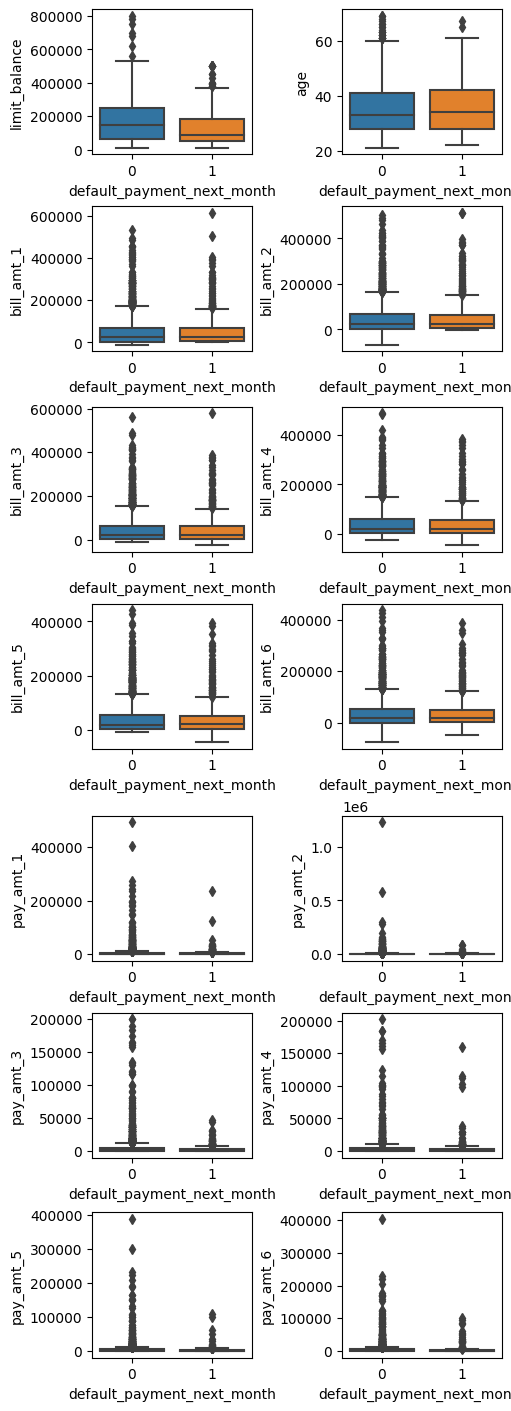

In [13]:
# prevent global variable
def isolate():
    fig, axes = plt.subplots(nrows=7, ncols=2, constrained_layout=True, figsize=(5,14))
    for column, ax in zip(numerical_columns, axes.ravel()):
        sns.boxplot(data=data_set, x="default_payment_next_month", y=column, ax=ax)

isolate()

In [14]:
# get skew of numerical columns
# every numerical columns are moderately or highly skewed to the right
# use StandardScaler!
def isolate():
    display(data_set[numerical_columns].skew())
isolate()

limit_balance     1.000442
age               0.772887
bill_amt_1        2.484598
bill_amt_2        2.458349
bill_amt_3        2.569937
bill_amt_4        2.448175
bill_amt_5        2.400343
bill_amt_6        2.432406
pay_amt_1        11.877647
pay_amt_2        29.404261
pay_amt_3         8.044639
pay_amt_4         8.451541
pay_amt_5        11.468890
pay_amt_6         9.760184
dtype: float64

In [15]:
# prevent global variable
# get the lower fence and upper fence
def isolate():
    q1, q3 = data_set['bill_amt_2'].quantile([.25, .75])
    iqr = q3 - q1
    print(q1 - 1.5*iqr, q3 + 1.5*iqr)

isolate()

-93265.5 164482.5


In [16]:
# check the value of 'pay_2' of person with 'bill_amt_2' > 120k
# 'bill_amt_2' does not need to be paid in full.
data_set.loc[data_set['bill_amt_2'] > 164482.5, ['pay_2', 'bill_amt_2', 'pay_amt_1']][:10]

,pay_2,bill_amt_2,pay_amt_1
3,0,305327,9405
9,0,195970,7822
10,0,167378,54209
12,0,173440,8083
13,0,171565,20000
14,0,176294,5519
16,0,254078,9251
28,0,177644,6100
29,0,295998,13200
33,0,169969,8450


In [17]:
# check errors
# we can't assume that if bill > limit_balance as errors.
# this is because limit_balance does not give us information about
# the current limit_balance of every month.
data_set.loc[(data_set['limit_balance'] < data_set['bill_amt_1']) |
            (data_set['limit_balance'] < data_set['bill_amt_2']) |
            (data_set['limit_balance'] < data_set['bill_amt_3']) |
            (data_set['limit_balance'] < data_set['bill_amt_4']) |
            (data_set['limit_balance'] < data_set['bill_amt_5']) |
            (data_set['limit_balance'] < data_set['bill_amt_6']), 
            ['limit_balance', 'bill_amt_1', 'bill_amt_2', 'bill_amt_4', 'bill_amt_5',
             'bill_amt_6']]

,limit_balance,bill_amt_1,bill_amt_2,bill_amt_4,bill_amt_5,bill_amt_6
3,230000,301038,305327,216260,215968,174195
5,140000,132541,136186,140962,137819,137094
7,130000,130067,129385,98071,97743,100124
19,50000,48875,50103,31459,28901,29523
31,70000,136809,118811,53696,11790,12045
...,...,...,...,...,...,...
2936,50000,51132,49594,48532,27308,27539
2937,60000,60521,61450,28853,29510,26547
2938,30000,28854,30467,28961,29397,29988
2939,80000,77760,79248,60989,41023,42663


In [18]:
# index 446 'bill_amt_2' have minus values with 'pay_2' -2 and pay_amt_1 0
# this indicates that minus values in 'bill_amt_2' as overpayment.
data_set.loc[(data_set['bill_amt_2'] < 0), ['pay_2', 'bill_amt_2', 'pay_amt_1']][:10]

,pay_2,bill_amt_2,pay_amt_1
446,-2,-420,0
447,-2,-5,0
455,-2,-1935,10000
456,-2,-694,0
459,-2,-31,0
465,-2,-316,0
471,-2,-58,0
476,-2,-3,0
480,-2,-4,0
489,-2,-2,0


## 3 - Relationship X Categorical and y Categorical

no nominal columns that can indicate a person will default.

ordinal columns 'pay_6' to 'pay_0' are good separator of instance with 'default_payment_next_month' '1'. A person is more likely to defaulted after delaying payments for 2 months. 

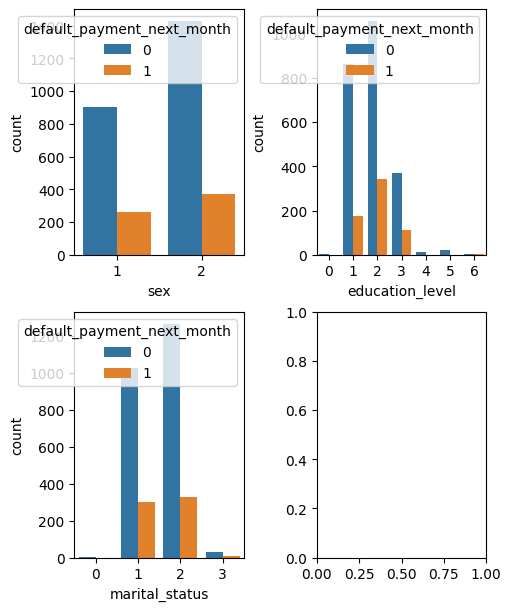

In [19]:
# prevent global variable
def isolate():
    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(5,6))
    for column, ax in zip(nominal_columns, axes.ravel()):
        sns.countplot(data=data_set, x=column, hue="default_payment_next_month", ax=ax)
        
isolate()

<AxesSubplot: xlabel='education_level', ylabel='count'>

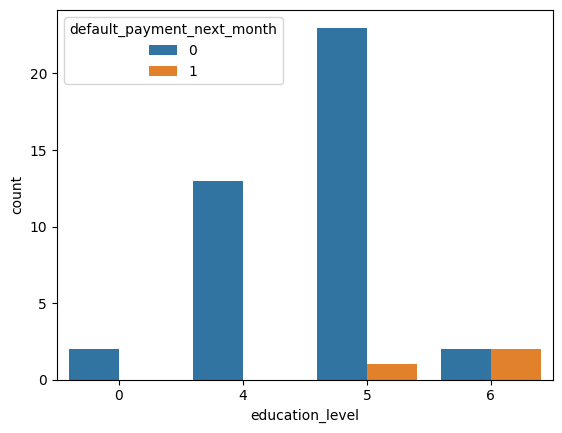

In [20]:
# double check education_level
# education_level=6 or unknown is more likely to default 
# compared to other education_level
# However, the frequency is too small.
sns.countplot(data=data_set[~data_set['education_level'].isin([1,2,3])], 
              x="education_level", hue="default_payment_next_month")

<AxesSubplot: xlabel='marital_status', ylabel='count'>

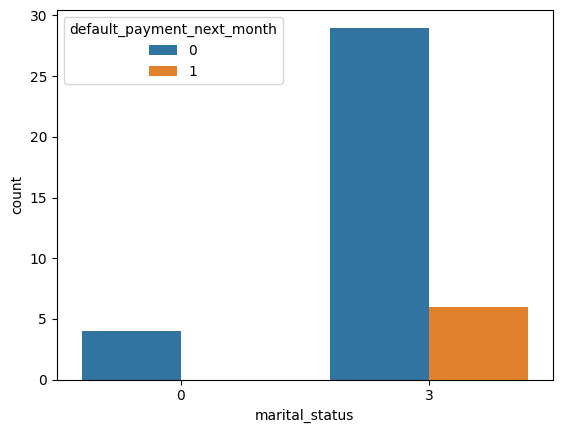

In [21]:
# marital_status is not a good separator of default_payment_next_month.
sns.countplot(data=data_set[data_set['marital_status'].isin(values=[0, 3])], 
              x="marital_status", hue="default_payment_next_month")

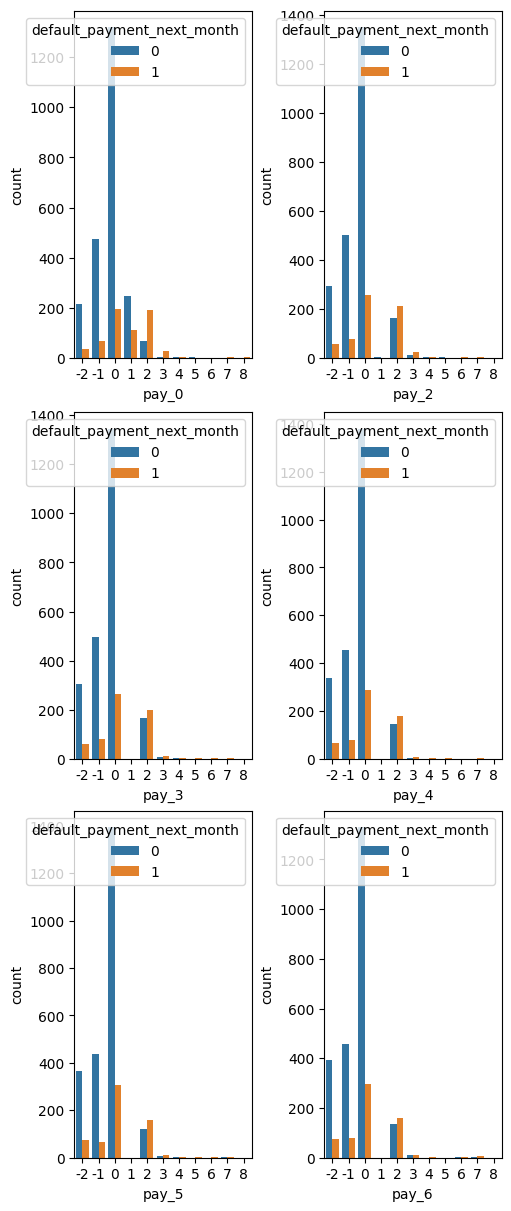

In [22]:
# prevent global variable
# people are more likely to default next month after delaying payment for 2 months
def isolate():
    fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(5,12))
    for column, ax in zip(ordinal_columns, axes.ravel()):
        sns.countplot(data=data_set, x=column, hue="default_payment_next_month", ax=ax)

isolate()

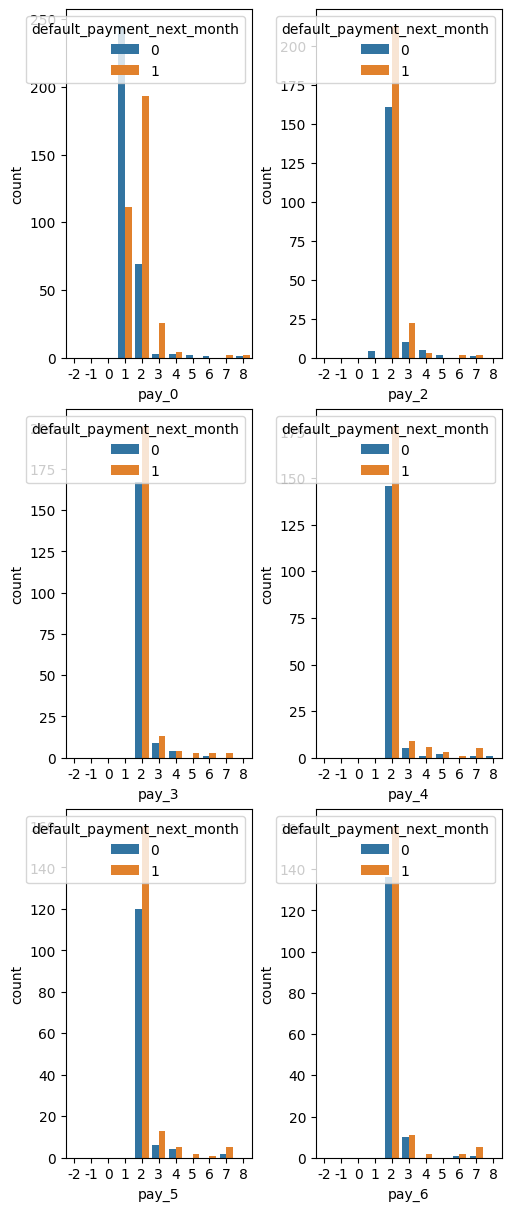

In [23]:
# double check if 'pay_0' to 'pay_6' with value 1 is more likely to default_payment_next_month '1'
# we can see that, if a person delayed payment for 2 months, the more likely that the person to default_payment_next_month '1'

# prevent global variable
def isolate():
    fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(5,12))
    for column, ax in zip(ordinal_columns, axes.ravel()):
        sns.countplot(data=data_set[data_set[column].cat.codes > 2], x=column, hue="default_payment_next_month", ax=ax)

isolate()

In [24]:
# prevent global variable:
# index 3 the person was paying with payment plan ('pay_6' to 'pay_0' value are always 0)
# however, the next month that person defaulted.
# therefore, we can't drop any of the columns
def isolate():
    columns = np.concatenate([ordinal_columns, numerical_columns[2:]], axis=0)
    display(data_set.loc[data_set['default_payment_next_month'] == 1, columns])

isolate()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
3,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
6,0,0,0,0,0,0,13561,14573,15290,16300,16624,16974,1543,1260,1270,594,617,1425
8,2,0,0,0,0,2,63426,57922,55010,52540,56236,40922,2700,2500,1900,4600,0,1600
30,0,0,0,0,0,0,3769,4782,5797,6654,6786,7077,1239,1254,1111,243,400,252
33,0,0,0,0,0,0,165686,169969,170142,119529,122059,111378,8450,5289,4022,4195,3986,3958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2,2,2,0,0,0,17497,18219,17629,18036,18446,18840,1300,0,700,700,700,800
2956,1,2,0,0,0,0,17614,17042,18052,18562,18814,19500,0,1300,810,700,1000,900
2958,3,2,2,2,3,3,6269,7212,7246,8073,8349,8420,1200,300,1100,700,500,0
2959,1,-2,-2,-2,-1,-1,-200,-200,-200,0,700,1935,0,0,200,700,1935,0


## 4 - Imbalance Dataset

[reference](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

The dataset is imbalanced. The dataset set is have high variations as well.

Therefore, do not do under sampling to avoid losing information.

- [ ] do over sampling

In [25]:
# check if the dataset is imbalanced.
data_set['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

In [26]:
# check if high variations
# out of 2964 rows, only 1 is duplicated.
data_set.value_counts()

limit_balance  sex  education_level  marital_status  age  pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month
200000         2    1                1               34   1      -2     -2     -2     -2     -2     0            0          0           0           0           0           0          0          0          0          0          0          0                             2
10000          1    1                2               23   2      2      2      2      -2     -1     2724         5520       5275        0           0           150         3000       0          0          0          150        275        0                             1
200000         2    1                2               40   2      2      0      0      0      2      185696       181236     185410      189069      197736      183299      0          8600       8

# 5 - Data Preprocessing
  > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [27]:
# Split dataset to Inference Set
inference_set = data_set.sample(10, random_state=17)

In [28]:
# Remove Inference Set from dataset
data_train_test = data_set.drop(inference_set.index)

In [29]:
# Split dataset to X and y
X = data_train_test.drop(['default_payment_next_month'], axis=1)
y = data_train_test['default_payment_next_month']

In [30]:
# Split dataset to Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=17,
                                                    stratify=y)

In [31]:
# Over sampling to make the train set balanced
ros = RandomOverSampler(sampling_strategy=1, random_state=17)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

0    1858
1    1858
Name: default_payment_next_month, dtype: int64

## 1 - Pipeline

Pipeline to handle outliers, missing values, do feature engineering (scaling, encoding).

In [32]:
# feature scaling
numerical_transformer = Pipeline(
    steps=[
        # the numerical columns have natural outliers.
        ('imputer', SimpleImputer(strategy="median")),
        # the numerical columns are moderately to highly skewed to the right.
        ('scaler', StandardScaler())
    ]
)

# feature encoding
ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OrdinalEncoder(categories=[
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories]))
        # do not scale ordinal.
    ]
)

nominal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        # drop='first' to avoid multicollinearity
        # handle_unknown='ignore' to handle the model with never seen data
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

## 1 - Multicollinearity

- [x] use data that have been preprocessed.

- [x] drop columns 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5'
- [x] drop columns 'pay_5'
- [x] drop column 'education_level'

In [33]:
# check multicollinearity with pearson for numerical.
def isolate():
    # change numerical_columns to columns to see the effect
    global numerical_columns_selected
    numerical_columns_selected = numerical_columns[np.where(~np.in1d(numerical_columns, 
                                                  ['bill_amt_2', 'bill_amt_5',
                                                   'bill_amt_4', 'bill_amt_3']))]

    X_train_res_numerical_scaled = numerical_transformer \
        .fit_transform(X=X_train_res[numerical_columns])
    df = pd.DataFrame(data=X_train_res_numerical_scaled, columns=numerical_columns)

    display(df[numerical_columns_selected].corr(method="pearson")
              .style.background_gradient(cmap='coolwarm'))
isolate()

,limit_balance,age,bill_amt_1,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
limit_balance,1.000000,0.098552,0.372956,0.345330,0.170600,0.157690,0.235808,0.186620,0.193831,0.229629
age,0.098552,1.000000,0.070845,0.032778,0.027293,0.001418,0.009460,0.071596,0.012553,0.008281
bill_amt_1,0.372956,0.070845,1.000000,0.788369,0.119003,0.100761,0.138719,0.194532,0.126361,0.187869
bill_amt_6,0.345330,0.032778,0.788369,1.000000,0.191844,0.098341,0.214437,0.254205,0.267732,0.105476
pay_amt_1,0.170600,0.027293,0.119003,0.191844,1.000000,0.439600,0.274814,0.086407,0.123398,0.104687
pay_amt_2,0.157690,0.001418,0.100761,0.098341,0.439600,1.000000,0.339105,0.079460,0.048939,0.103137
pay_amt_3,0.235808,0.009460,0.138719,0.214437,0.274814,0.339105,1.000000,0.130271,0.143772,0.159292
pay_amt_4,0.186620,0.071596,0.194532,0.254205,0.086407,0.079460,0.130271,1.000000,0.099837,0.124718
pay_amt_5,0.193831,0.012553,0.126361,0.267732,0.123398,0.048939,0.143772,0.099837,1.000000,0.099873
pay_amt_6,0.229629,0.008281,0.187869,0.105476,0.104687,0.103137,0.159292,0.124718,0.099873,1.000000


In [34]:
# check multicollinearity with spearman for ordinal
# prevent global variable
# 'pay_2' and 'pay_3' have corr 0.79
# 'pay_3' and 'pay_4' have corr 0.76
# 'pay_4' and 'pay_5' have corr 0.84
# 'pay_5' and 'pay_6' have corr 0.82
# drop 'pay_5'
def isolate():
    # columns do not contains column 'pay_5'
    global ordinal_columns_selected
    ordinal_columns_selected = ordinal_columns[np.where(ordinal_columns != 'pay_5')]

    X_train_res_ordinal_encoded = ordinal_transformer \
                                    .fit_transform(X=X_train_res[ordinal_columns])
    df = pd.DataFrame(data=X_train_res_ordinal_encoded, columns=ordinal_columns)

    display(df[ordinal_columns_selected].corr()
                       .style.background_gradient(cmap="coolwarm"))

isolate()

,pay_0,pay_2,pay_3,pay_4,pay_6
pay_0,1.000000,0.698298,0.590539,0.542344,0.509950
pay_2,0.698298,1.000000,0.799017,0.655866,0.598618
pay_3,0.590539,0.799017,1.000000,0.760486,0.639383
pay_4,0.542344,0.655866,0.760486,1.000000,0.730627
pay_6,0.509950,0.598618,0.639383,0.730627,1.000000


In [35]:
# reference: https://passel2.unl.edu/view/lesson/9beaa382bf7e/8#:~:text=If%20your%20chi%2Dsquare%20calculated,to%20reject%22%20your%20null%20hypothesis.
# p < 0.05 : education level - marital status observed deviations are significant.
# chi-square > critical value : reject null hypothesis. 
# alternative hypohesis: there are relationship between 'education_level' and 'marital_status'

def isolate():
    global nominal_columns_selected
    nominal_columns_selected = nominal_columns[np.where(nominal_columns != 'education_level')]

    for i in range(len(nominal_columns_selected)):
        for j in range(len(nominal_columns_selected)):
            if i == j or i > j:
                continue
            print(f'{nominal_columns_selected[i]} - {nominal_columns_selected[j]}')
            chi2, p, dof, _ = scipy.stats.chi2_contingency(observed=pd.crosstab(X_train_res[nominal_columns_selected[i]], 
                                                                                X_train_res[nominal_columns_selected[j]]))
            critical = scipy.stats.chi2.ppf(q=0.95, df=dof)
            print(f'chi2: {chi2:.2f} {chi2 > critical}; p: {p:.2f} {p < 0.05}; dof: {dof};')
isolate()

sex - marital_status
chi2: 5.78 False; p: 0.12 False; dof: 3;


## 1 - Pipeline (After Feature Selection)

Pipeline to handle outliers, missing values, do feature engineering (scaling, encoding).

In [36]:
# feature encoding
# 'pay_5' is dropped, so we have to remove it from the pipeline.
ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OrdinalEncoder(categories=[
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories,
                                    type_pay0_pay6.categories]))
        # do not scale ordinal.
    ]
)

## 3 - Preprocessor

In [37]:
# preprocessor for end-to-end
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_columns_selected),
        ("ordinal", ordinal_transformer, ordinal_columns_selected),
        ("nominal", nominal_transformer, nominal_columns_selected)
    ]
)

# 6 - Model Definition
  > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 1 - Logistic Regression

In [38]:
# logistic regression pipeline
log_reg_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', LogisticRegression())
    ]
)

## 2 - SVM

In [39]:
# support vector machine pipeline
svm_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', SVC())
    ]
)

## 3 - Decision Tree

In [40]:
# decision tree pipeline
tree_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', DecisionTreeClassifier())
    ]
)

## 4 - KNN

In [41]:
# KNearestNeighbors pipeline
knn_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', KNeighborsClassifier())
    ]
)

## 5 - Naive Bayes

In [52]:
# NaiveBayes pipeline
nb_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', GaussianNB())
    ]
)

## 6 - Random Forest

In [58]:
rf_default = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classification', RandomForestClassifier())
    ]
)

# 7 - Model Training
  > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 1 - Default Parameter

### 1 - Logistic Regression

In [42]:
# training the algorithm with default parameter
log_reg_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', LogisticRegression())])

### 2 - SVM

In [43]:
# training the algorithm with default parameter
svm_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64'),
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', SVC())])

### 3 - Decision Tree

In [44]:
# training the algorithm with default parameter
tree_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', DecisionTreeClassifier())])

### 4 - KNN

In [45]:
# training the algorithm with default parameter
knn_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', KNeighborsClassifier())])

### 5 - Naive Bayes

In [54]:
# training the algorithm with default parameter
nb_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64'),
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', GaussianNB())])

### 6 - Random Forest

In [59]:
rf_default.fit(X=X_train_res, y=y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['limit_balance', 'age', 'bill_amt_1', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'],
      dtype=object)),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   S...
                                                                                              Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')]))]),
                                                  array(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_6'], dtype=object)),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  array(['sex', 'marital_status'], dtype=object))])),
                ('classification', RandomForestClassifier())])

## 2 - Model Tuning

  Goal: To find the best parameters for the algorithm.

  We are going to use `sklearn.model_selection.GridSearchCV` (based on best algorithm with default parameters)

  Task: 
  1. compare the metrics between algorithm with default parameters and best parameters.

  Algorithm with the best cross validate result is [Random Forest](#8116---random-forest)

# 8 - Model Evaluation
  > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

## 1 - `sklearn.model_selection.cross_validate` and `sklearn.metrics`

  Goal: To validate if the metrics aree consistent and not due to data leakage.

  Metrics used are: `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, `sklearn.metrics.f1_score` with parameter 'average=None' and `sklearn.metrics.accuracy_score`.

  Task:
  1. metrics interpretation.
  2. weakness/strength of the model.
  3. improvement.

In [61]:
# method to display cross validate result
def cross_validate_display(estimator):
    scoring = {'recall': make_scorer(score_func=recall_score, pos_label=1),
               'precision': make_scorer(score_func=precision_score, pos_label=1, zero_division=0),
               'f1': make_scorer(score_func=f1_score, pos_label=1),
               'accuracy_score': make_scorer(score_func=accuracy_score)}
    cv_result = cross_validate(estimator=estimator, X=X_train_res, y=y_train_res,
                               scoring=scoring, return_train_score=True)

    # arithmetic mean is used because the number of samples are equal.
    get_mean_std = lambda array: [array.mean(), array.std()]

    with np.printoptions(precision=2):
        display(cv_result)

    with pd.option_context("display.float_format", "{:.2f}".format):
        display(pd.DataFrame(data={'train recall': get_mean_std(cv_result['train_recall']),
                                   'test recall': get_mean_std(cv_result['test_recall']),
                                   'train precision': get_mean_std(cv_result['train_recall']),
                                   'test precision': get_mean_std(cv_result['test_precision']),
                                   'train f1': get_mean_std(cv_result['train_f1']),
                                   'test f1': get_mean_std(cv_result['test_f1']),
                                   'train accuracy_score': get_mean_std(cv_result['train_accuracy_score']),
                                   'test accuracy_score': get_mean_std(cv_result['test_accuracy_score']),
                                  },
                            index=['mean', 'std']).T)

### 1 - Default Parameters

#### 1 - Logistic Regression

In [62]:
cross_validate_display(estimator=log_reg_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.2 , 0.08, 0.05, 0.04, 0.14]),
 'score_time': array([0.01, 0.01, 0.01, 0.02, 0.01]),
 'test_recall': array([0.68, 0.7 , 0.65, 0.65, 0.65]),
 'train_recall': array([0.69, 0.66, 0.68, 0.66, 0.67]),
 'test_precision': array([0.68, 0.7 , 0.67, 0.68, 0.68]),
 'train_precision': array([0.7 , 0.67, 0.7 , 0.69, 0.68]),
 'test_f1': array([0.68, 0.7 , 0.66, 0.66, 0.67]),
 'train_f1': array([0.69, 0.67, 0.69, 0.68, 0.67]),
 'test_accuracy_score': array([0.68, 0.7 , 0.66, 0.67, 0.67]),
 'train_accuracy_score': array([0.69, 0.67, 0.69, 0.68, 0.68])}

,mean,std
train recall,0.67,0.01
test recall,0.67,0.02
train precision,0.67,0.01
test precision,0.68,0.01
train f1,0.68,0.01
test f1,0.67,0.01
train accuracy_score,0.68,0.01
test accuracy_score,0.68,0.01


#### 2 - SVM

In [63]:
cross_validate_display(estimator=svm_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.14, 0.13, 0.13, 0.13, 0.13]),
 'score_time': array([0.06, 0.06, 0.06, 0.06, 0.06]),
 'test_recall': array([0.55, 0.59, 0.56, 0.54, 0.59]),
 'train_recall': array([0.59, 0.58, 0.59, 0.59, 0.57]),
 'test_precision': array([0.82, 0.84, 0.84, 0.81, 0.82]),
 'train_precision': array([0.86, 0.84, 0.84, 0.84, 0.84]),
 'test_f1': array([0.66, 0.69, 0.67, 0.65, 0.69]),
 'train_f1': array([0.7 , 0.69, 0.69, 0.7 , 0.68]),
 'test_accuracy_score': array([0.71, 0.74, 0.73, 0.71, 0.73]),
 'train_accuracy_score': array([0.74, 0.73, 0.74, 0.74, 0.73])}

,mean,std
train recall,0.58,0.01
test recall,0.57,0.02
train precision,0.58,0.01
test precision,0.82,0.01
train f1,0.69,0.01
test f1,0.67,0.02
train accuracy_score,0.74,0.00
test accuracy_score,0.72,0.01


#### 3 - Decision Tree

In [64]:
cross_validate_display(estimator=tree_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.03, 0.03, 0.02, 0.03, 0.03]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0.96, 0.98, 1.  , 1.  , 1.  ]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.84, 0.85, 0.84, 0.85, 0.82]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.9 , 0.91, 0.91, 0.92, 0.9 ]),
 'train_f1': array([1., 1., 1., 1., 1.]),
 'test_accuracy_score': array([0.89, 0.9 , 0.91, 0.91, 0.89]),
 'train_accuracy_score': array([1., 1., 1., 1., 1.])}

,mean,std
train recall,1.00,0.00
test recall,0.99,0.02
train precision,1.00,0.00
test precision,0.84,0.01
train f1,1.00,0.00
test f1,0.91,0.01
train accuracy_score,1.00,0.00
test accuracy_score,0.90,0.01


#### 4 - KNN

In [65]:
cross_validate_display(estimator=knn_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.02, 0.01, 0.01, 0.01, 0.01]),
 'score_time': array([0.02, 0.01, 0.01, 0.01, 0.02]),
 'test_recall': array([0.85, 0.87, 0.84, 0.91, 0.84]),
 'train_recall': array([0.94, 0.94, 0.93, 0.93, 0.92]),
 'test_precision': array([0.75, 0.73, 0.73, 0.74, 0.72]),
 'train_precision': array([0.8 , 0.8 , 0.8 , 0.79, 0.81]),
 'test_f1': array([0.8 , 0.79, 0.78, 0.82, 0.78]),
 'train_f1': array([0.87, 0.86, 0.86, 0.86, 0.86]),
 'test_accuracy_score': array([0.78, 0.77, 0.77, 0.8 , 0.76]),
 'train_accuracy_score': array([0.85, 0.85, 0.85, 0.84, 0.85])}

,mean,std
train recall,0.93,0.01
test recall,0.86,0.03
train precision,0.93,0.01
test precision,0.73,0.01
train f1,0.86,0.00
test f1,0.79,0.02
train accuracy_score,0.85,0.00
test accuracy_score,0.78,0.02


#### 5 - Naive Bayes

In [66]:
cross_validate_display(estimator=nb_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.01, 0.01, 0.01, 0.01, 0.01]),
 'score_time': array([0.01, 0.01, 0.  , 0.  , 0.  ]),
 'test_recall': array([0.95, 0.91, 0.93, 0.95, 0.92]),
 'train_recall': array([0.93, 0.93, 0.93, 0.93, 0.93]),
 'test_precision': array([0.55, 0.53, 0.55, 0.55, 0.54]),
 'train_precision': array([0.54, 0.54, 0.54, 0.55, 0.54]),
 'test_f1': array([0.69, 0.67, 0.69, 0.69, 0.68]),
 'train_f1': array([0.69, 0.69, 0.68, 0.69, 0.69]),
 'test_accuracy_score': array([0.58, 0.55, 0.58, 0.58, 0.57]),
 'train_accuracy_score': array([0.57, 0.58, 0.57, 0.58, 0.57])}

,mean,std
train recall,0.93,0.00
test recall,0.93,0.02
train precision,0.93,0.00
test precision,0.54,0.01
train f1,0.69,0.00
test f1,0.69,0.01
train accuracy_score,0.57,0.00
test accuracy_score,0.57,0.01


#### 8.1.1.6 - Random Forest

In [67]:
cross_validate_display(estimator=rf_default)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([0.28, 0.28, 0.28, 0.28, 0.28]),
 'score_time': array([0.01, 0.01, 0.01, 0.01, 0.01]),
 'test_recall': array([0.97, 0.98, 1.  , 1.  , 1.  ]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.93, 0.92, 0.93, 0.91, 0.91]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.95, 0.95, 0.96, 0.95, 0.95]),
 'train_f1': array([1., 1., 1., 1., 1.]),
 'test_accuracy_score': array([0.95, 0.95, 0.96, 0.95, 0.95]),
 'train_accuracy_score': array([1., 1., 1., 1., 1.])}

,mean,std
train recall,1.00,0.00
test recall,0.99,0.01
train precision,1.00,0.00
test precision,0.92,0.01
train f1,1.00,0.00
test f1,0.95,0.00
train accuracy_score,1.00,0.00
test accuracy_score,0.95,0.00


### 2 - Random Forest with Tuned Parameters

  Task:
  1. Only best algorithm gets evaluated.

# 8 - Model Inference
  > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

## 1 - (Algorithm) with Tuned Parameters

  Task:
  1. Only best algorithm gets deployed.

# 10 - Pengambilan Kesimpulan
  > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan _objective_ yang sudah ditulis di bagian pengenalan.

# Conceptual Problems

1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
   1. Criterion is the scoring used by Decision Tree to determine whether the algorithm should split the leaf or not.
   2. in `sklearn.tree.DecisionTreeClassifier` there are gini, entropy and log_loss.
      
      Entropy is sum of `-probability * log₂(probability)`. i.e probability of buying computer:
      1. Entropy(<=30) = 3 people did not buy the computer and 2 people did buy the computer `(-3/5 * log₂(3/5)) + (-2/5 * log₂(2/5))`

      `criterion='gini'` actually use Gain to determine whether to split the leaf or not.

      Gain is the difference between Entropy(Total) and Entropy(Feature). ie `Gain(Feature) = Entropy(Total) - Entropy(Feature)`. The highest Gain(Feature) will be selected to be the next leaf to be splitted.

      Gini is the impurity within a leaf. ie if within a leaf, all of the samples are buying computer. Then, the Gini is 0.

      The gini equation  `1 - squared probability of everyy class within the leaf`. ie if within a leaf there is 1 person did not buy computer, and 5 person did not buy the computer. The Gini is `1 - ( (1/6)² + (5/6)² )` or 0.278

2. Apakah fungsi dari `pruning` pada Tree model?
   1. Pruning is to reduce the decision tree. It is similar to regularization in linear model. It is a way to prevent the model from becoming overfitted.
   2. in `sklearn.tree.DecisionTreeClassifier`, we can change the parameter `min_samples_leaf` and `max_depth` to do pruning.
   3. `min_samples_leaf` prevents the algorithm to split the leaf even though the gini is not 0 if the minimum samples to split is not met.
   4. `max_depth` prevents the algorithm to split the leaf if the maximum depth has been reached.
   5. Becareful of pre-pruning.
   
3. Bagaimana cara memilih `K` yang optimal pada KNN?
   1. There is no statistics equation to find the optimal KNN.
   2. However, always start with small `K` or in `sklearn.neighbors.KNeighborsClassifier` small `n_neighbors` parameter.
   3. Increase the `n_neighbors` one iteration at a time until you get good fit (train set and test set metrics is similar) and stop there. To simplify, use the `sklearn.metrics.accuracy_score` and plot it.
   ![visual](./images/Screen%20Shot%202022-11-13%20at%2017.50.45.png)
   4. `sklearn.neigbors.KNeighborsClassifier` always do multiple calculation for every prediction. In this case, calculating the (usually) euclidean distance between the test point and close train points. Therefore, the higher the `n_neighbors` parameter is set, the more expensive is the computational cost.

4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!
   1. `sklearn.model_selection.cross_validate` checks if the model metrics are high not because of the test set are actually a seen data set / data leakage.
   2. The idea is to split the train set into X amount of dataset. Each of these dataset will have turn to be used as train set and test set. If there is no data leakage, the model metrics' arithmetic mean should be high and standard deviation should be low.

5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score`!
   Recall class 1:
   1. It explains the model ability to find class 1.

   Precision class 1:
   1. It explains the model ability to not label an instance as class 1 that is actually class 0.

   F1 Score:
   1. The harmonic mean of recall and precision.
   2. Harmonic mean is used because recall `tp / (tp + fn)` and precision `tp / (tp + fp)` have different number of samples.
      
      [reference](https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision)
    
   Accuracy:
   1.  It explains the model ability to find class 1 and class 0.

